In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv("train.csv")

In [4]:
df.columns 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [32]:
missing=df.isna().sum().to_frame()
missing.reset_index(level=0, inplace=True)

missing.columns =["Cols","Count"]


In [34]:
missing[missing.Count>0]

,Cols,Count
3,LotFrontage,259
6,Alley,1369
25,MasVnrType,8
26,MasVnrArea,8
30,BsmtQual,37
31,BsmtCond,37
32,BsmtExposure,38
33,BsmtFinType1,37
35,BsmtFinType2,38
42,Electrical,1


In [25]:
df["LotFrontage"].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [15]:
df["MiscFeature"].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [16]:
df["PoolQC"].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [35]:
df["MiscFeature"].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [38]:
df["MiscFeature"].fillna("None",inplace=True)

In [39]:
df["MiscFeature"].value_counts()

None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [40]:
df["Fence"].fillna("No Fence",inplace=True)

In [41]:
df["PoolQC"].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [42]:
df["PoolQC"].fillna("No Pool",inplace=True)

In [43]:
df["FireplaceQu"].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [44]:
df["FireplaceQu"].fillna("No Fireplace",inplace=True)

In [45]:
df["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [53]:
df["BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [54]:
df["BsmtQual"].fillna("No Basement",inplace=True)

In [49]:
df["BsmtCond"].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [55]:
 df["BsmtCond"].fillna("No Basement",inplace=True)

In [52]:
df["BsmtExposure"].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [56]:
 df["BsmtExposure"].fillna("No Basement",inplace=True)

In [51]:
df["BsmtFinType1"].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [57]:
 df["BsmtFinType1"].fillna("No Basement",inplace=True)

In [50]:
df["BsmtFinType2"].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [58]:
 df["BsmtFinType2"].fillna("No Basement",inplace=True)

In [59]:
missing=df.isna().sum().to_frame()
missing.reset_index(level=0, inplace=True)

missing.columns =["Cols","Count"]
missing[missing.Count>0]

,Cols,Count
3,LotFrontage,259
6,Alley,1369
25,MasVnrType,8
26,MasVnrArea,8
42,Electrical,1
58,GarageType,81
59,GarageYrBlt,81
60,GarageFinish,81
63,GarageQual,81
64,GarageCond,81


In [60]:
df["Alley"].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [61]:
df["Alley"].fillna("No Alley",inplace=True)

In [62]:
df["Alley"].value_counts()

No Alley    1369
Grvl          50
Pave          41
Name: Alley, dtype: int64

In [63]:
df["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [64]:
df["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [69]:
 df["GarageType"].fillna("No Garage",inplace=True)

In [68]:
df["GarageYrBlt"].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [72]:
 df["GarageYrBlt"].fillna("0000",inplace=True)

In [67]:
df["GarageFinish"].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [71]:
 df["GarageFinish"].fillna("No Garage",inplace=True)

In [66]:
df["GarageQual"].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [70]:
 df["GarageQual"].fillna("No Garage",inplace=True)

In [65]:
df["GarageCond"].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [73]:
 df["GarageCond"].fillna("No Garage",inplace=True)

In [74]:
missing=df.isna().sum().to_frame()
missing.reset_index(level=0, inplace=True)

missing.columns =["Cols","Count"]
missing[missing.Count>0]


,Cols,Count
3,LotFrontage,259
25,MasVnrType,8
26,MasVnrArea,8
42,Electrical,1


In [76]:
 df["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [78]:
 df["MasVnrType"].fillna("None",inplace=True)

In [77]:
 df["MasVnrArea"].value_counts()

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [79]:
df["MasVnrArea"].fillna("0",inplace=True)

In [80]:
df["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [81]:
 df["Electrical"].fillna("SBrkr",inplace=True)

In [82]:
missing=df.isna().sum().to_frame()
missing.reset_index(level=0, inplace=True)

missing.columns =["Cols","Count"]
missing[missing.Count>0]

,Cols,Count
3,LotFrontage,259


In [84]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

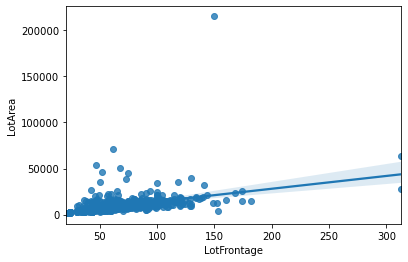

In [86]:
sns.regplot(df["LotFrontage"],df["LotArea"])

In [88]:
df[["LotFrontage","LotArea"]].corr()

,LotFrontage,LotArea
LotFrontage,1.000000,0.426095
LotArea,0.426095,1.000000


In [92]:
df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [93]:
df[df["LotFrontage"].isnull()]["LotShape"].value_counts()

IR1    167
Reg     74
IR2     15
IR3      3
Name: LotShape, dtype: int64

In [94]:
df[df["LotFrontage"].isnull()]["Neighborhood"].value_counts()

NAmes      39
Gilbert    30
NWAmes     28
Sawyer     26
CollgCr    24
ClearCr    15
Mitchel    13
Crawfor    10
SawyerW     9
Timber      8
Edwards     8
NoRidge     8
Somerst     8
BrkSide     7
StoneBr     5
Veenker     4
OldTown     4
IDOTRR      3
Blmngtn     3
SWISU       2
NPkVill     2
MeadowV     2
NridgHt     1
Name: Neighborhood, dtype: int64

In [107]:
df1=df[df["Neighborhood"]=="NridgHt"][["LotFrontage","MSSubClass","MSZoning","LandSlope","Neighborhood","LotConfig","LandContour","LotShape","Alley","Street","LotArea"]]

In [108]:
df1


,LotFrontage,MSSubClass,MSZoning,LandSlope,Neighborhood,LotConfig,LandContour,LotShape,Alley,Street,LotArea
11,85.0,60,RL,Gtl,NridgHt,Inside,Lvl,IR1,No Alley,Pave,11924
20,101.0,60,RL,Gtl,NridgHt,Corner,Lvl,IR1,No Alley,Pave,14215
25,110.0,20,RL,Gtl,NridgHt,Corner,Lvl,Reg,No Alley,Pave,14230
27,98.0,20,RL,Gtl,NridgHt,Inside,Lvl,Reg,No Alley,Pave,11478
34,60.0,120,RL,Gtl,NridgHt,Inside,Lvl,Reg,No Alley,Pave,7313
...,...,...,...,...,...,...,...,...,...,...,...
1289,86.0,60,RL,Gtl,NridgHt,Inside,Lvl,IR1,No Alley,Pave,11065
1305,108.0,20,RL,Gtl,NridgHt,Corner,Lvl,IR1,No Alley,Pave,13173
1306,48.0,120,RL,Gtl,NridgHt,Inside,Lvl,IR1,No Alley,Pave,6955
1359,129.0,20,RL,Gtl,NridgHt,FR3,Lvl,Reg,No Alley,Pave,16737


In [110]:
df1[df1["LotFrontage"].isnull()]

,LotFrontage,MSSubClass,MSZoning,LandSlope,Neighborhood,LotConfig,LandContour,LotShape,Alley,Street,LotArea
1251,NaN,120,RL,Gtl,NridgHt,Corner,Lvl,IR1,No Alley,Pave,3136


In [111]:
df1[df1["LotConfig"]=="Corner"]

,LotFrontage,MSSubClass,MSZoning,LandSlope,Neighborhood,LotConfig,LandContour,LotShape,Alley,Street,LotArea
20,101.0,60,RL,Gtl,NridgHt,Corner,Lvl,IR1,No Alley,Pave,14215
25,110.0,20,RL,Gtl,NridgHt,Corner,Lvl,Reg,No Alley,Pave,14230
162,95.0,20,RL,Gtl,NridgHt,Corner,Lvl,Reg,No Alley,Pave,12182
320,111.0,60,RL,Gtl,NridgHt,Corner,Lvl,Reg,No Alley,Pave,16259
408,109.0,60,RL,Gtl,NridgHt,Corner,Lvl,Reg,No Alley,Pave,14154
591,97.0,60,RL,Gtl,NridgHt,Corner,Lvl,IR1,No Alley,Pave,13478
689,61.0,120,RL,Gtl,NridgHt,Corner,Lvl,IR1,No Alley,Pave,7577
774,110.0,20,RL,Gtl,NridgHt,Corner,Lvl,Reg,No Alley,Pave,14226
1228,65.0,120,RL,Gtl,NridgHt,Corner,Lvl,Reg,No Alley,Pave,8769
1251,NaN,120,RL,Gtl,NridgHt,Corner,Lvl,IR1,No Alley,Pave,3136


In [115]:
df1[(df1["LotConfig"]=="Corner") & (df1["LotShape"]=="IR1")]

,LotFrontage,MSSubClass,MSZoning,LandSlope,Neighborhood,LotConfig,LandContour,LotShape,Alley,Street,LotArea
20,101.0,60,RL,Gtl,NridgHt,Corner,Lvl,IR1,No Alley,Pave,14215
591,97.0,60,RL,Gtl,NridgHt,Corner,Lvl,IR1,No Alley,Pave,13478
689,61.0,120,RL,Gtl,NridgHt,Corner,Lvl,IR1,No Alley,Pave,7577
1251,NaN,120,RL,Gtl,NridgHt,Corner,Lvl,IR1,No Alley,Pave,3136
1305,108.0,20,RL,Gtl,NridgHt,Corner,Lvl,IR1,No Alley,Pave,13173


In [125]:
df1.drop("Street",inplace=True,axis=1)

In [126]:
df1.drop("Alley",inplace=True,axis=1)

In [127]:
df1


,LotFrontage,MSSubClass,MSZoning,LandSlope,Neighborhood,LotConfig,LandContour,LotShape,LotArea
11,85.0,60,RL,Gtl,NridgHt,Inside,Lvl,IR1,11924
20,101.0,60,RL,Gtl,NridgHt,Corner,Lvl,IR1,14215
25,110.0,20,RL,Gtl,NridgHt,Corner,Lvl,Reg,14230
27,98.0,20,RL,Gtl,NridgHt,Inside,Lvl,Reg,11478
34,60.0,120,RL,Gtl,NridgHt,Inside,Lvl,Reg,7313
...,...,...,...,...,...,...,...,...,...
1289,86.0,60,RL,Gtl,NridgHt,Inside,Lvl,IR1,11065
1305,108.0,20,RL,Gtl,NridgHt,Corner,Lvl,IR1,13173
1306,48.0,120,RL,Gtl,NridgHt,Inside,Lvl,IR1,6955
1359,129.0,20,RL,Gtl,NridgHt,FR3,Lvl,Reg,16737


In [114]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive